In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import time

**Загрузка данных**

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(2)

,Deal_id,Deal_date,First_deal_date,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,First_default_date,Successful_deals_count,Region,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Shop_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Shop_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1


In [5]:
df_train.shape

(3168, 19)

In [6]:
df_test.head(2)

,Deal_id,Deal_date,First_deal_date,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,First_default_date,Successful_deals_count,Region,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender
0,72875713,2016-10-14,2015-09-20,NaN,NaN,NaN,NaN,0.0,Shop_district_2,7,2.5,-3,18,2.5,-3,5,40.0,Female
1,75825544,2016-10-23,2015-06-16,NaN,NaN,NaN,NaN,6.0,Shop_district_3,18,2.5,-2,15,3.5,-3,5,66.0,Female


### Подготовка данных ###

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_user_info_1      535 non-null    float64
 4   Secret_user_info_2      535 non-null    float64
 5   Secret_user_info_3      535 non-null    float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3154 non-null   float64
 8   Region                  3161 non-null   object 
 9   Shop                    3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

In [8]:
type(df_train.Deal_date[0])

str

В колонках Deal_date, First_deal_date и First_default_date даты указаны строками.  
Заменим тип на datetime.

In [9]:
str_to_date_cols = ['Deal_date', 'First_deal_date', 'First_default_date']
for col in str_to_date_cols:
    df_train[col] = pd.to_datetime(df_train[col], format='%Y-%m-%d')
    df_test[col] = pd.to_datetime(df_test[col], format='%Y-%m-%d')
df_train.Deal_date.head(2)

0   2015-11-05
1   2016-08-26
Name: Deal_date, dtype: datetime64[ns]

Посмотрим количество уникальных значений в колонках.

In [10]:
df_train.nunique()

Deal_id                   3168
Deal_date                  486
First_deal_date            545
Secret_user_info_1           8
Secret_user_info_2           6
Secret_user_info_3           4
First_default_date          68
Successful_deals_count      14
Region                       8
Shop                        19
Hashed_deal_detail_1         7
Hashed_deal_detail_2        23
Hashed_deal_detail_3        23
Hashed_deal_detail_4        21
Hashed_deal_detail_5         7
Hashed_deal_detail_6         1
Age                         50
Gender                       2
Default                      2
dtype: int64

In [11]:
df_test.nunique()

Deal_id                   989
Deal_date                  96
First_deal_date           452
Secret_user_info_1          6
Secret_user_info_2          6
Secret_user_info_3          3
First_default_date         55
Successful_deals_count     19
Region                      8
Shop                       19
Hashed_deal_detail_1        5
Hashed_deal_detail_2       23
Hashed_deal_detail_3       25
Hashed_deal_detail_4       21
Hashed_deal_detail_5        5
Hashed_deal_detail_6        1
Age                        49
Gender                      2
dtype: int64

Колонка Hashed_deal_detail_6 принимает только 1 значение. Можем удалить, т.к. она не может выражать к.-л. зависимость.

In [12]:
df_train = df_train.drop(['Hashed_deal_detail_6'], axis=1)

In [13]:
df_test = df_test.drop(['Hashed_deal_detail_6'], axis=1)

**Посмотрим и заполним пропуски значений по колонкам**

In [14]:
df_train.isnull().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_user_info_1        2633
Secret_user_info_2        2633
Secret_user_info_3        2633
First_default_date        2633
Successful_deals_count      14
Region                       7
Shop                         0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Age                          0
Gender                       0
Default                      0
dtype: int64

In [15]:
df_test.isnull().sum()

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_user_info_1        849
Secret_user_info_2        849
Secret_user_info_3        849
First_default_date        849
Successful_deals_count      1
Region                      4
Shop                        0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Age                         0
Gender                      0
dtype: int64

Колонки Secret_user_info_1...3 и First_default_date имеют много пропусков.
Т.к. кол-во пропусков в этих колонках одинаково, проверим гипотезу, что колонки Secret_user_info_... не заполнялись для строк, у которых не задан First_default_date, т.е. не было дефолтов.

In [16]:
df_train[df_train['First_default_date'].isnull()].nunique()

Deal_id                   2633
Deal_date                  482
First_deal_date            537
Secret_user_info_1           0
Secret_user_info_2           0
Secret_user_info_3           0
First_default_date           0
Successful_deals_count      13
Region                       8
Shop                        19
Hashed_deal_detail_1         7
Hashed_deal_detail_2        22
Hashed_deal_detail_3        22
Hashed_deal_detail_4        18
Hashed_deal_detail_5         7
Age                         49
Gender                       2
Default                      2
dtype: int64

In [17]:
df_train[df_train['First_default_date'].isnull()].isnull().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_user_info_1        2633
Secret_user_info_2        2633
Secret_user_info_3        2633
First_default_date        2633
Successful_deals_count      14
Region                       5
Shop                         0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Age                          0
Gender                       0
Default                      0
dtype: int64

In [18]:
df_test[df_test['First_default_date'].isnull()].isnull().sum()

Deal_id                     0
Deal_date                   0
First_deal_date             0
Secret_user_info_1        849
Secret_user_info_2        849
Secret_user_info_3        849
First_default_date        849
Successful_deals_count      1
Region                      4
Shop                        0
Hashed_deal_detail_1        0
Hashed_deal_detail_2        0
Hashed_deal_detail_3        0
Hashed_deal_detail_4        0
Hashed_deal_detail_5        0
Age                         0
Gender                      0
dtype: int64

Гипотеза подтвердилась - все пропуски в строках, где нет даты первого дефолта, т.е. не было дефолтов.  
Для отличия от остальных строк заполним их, как вариант, новыми отличающимся от остальных значаниями, чтобы показать модели их отличие.

In [19]:
df_train.Secret_user_info_1.value_counts()

3.5    384
4.5     89
5.5     39
6.5     11
2.5      4
7.5      4
8.5      3
9.5      1
Name: Secret_user_info_1, dtype: int64

In [20]:
df_test.Secret_user_info_1.value_counts()

3.5    100
4.5     25
5.5      8
7.5      3
6.5      3
8.5      1
Name: Secret_user_info_1, dtype: int64

Пропуски в колонке Secret_user_info_1 заполним значением 1.5.

In [21]:
df_train['Secret_user_info_1'] = df_train.Secret_user_info_1.fillna(1.5)

In [22]:
df_train.Secret_user_info_1.isnull().sum()

0

In [23]:
df_test['Secret_user_info_1'] = df_test.Secret_user_info_1.fillna(1.5)

In [24]:
df_test.Secret_user_info_1.isnull().sum()

0

In [25]:
df_train.Secret_user_info_2.value_counts()

-2.0    243
-3.0    232
-1.0     51
 0.0      7
 2.0      1
 1.0      1
Name: Secret_user_info_2, dtype: int64

In [26]:
df_test.Secret_user_info_2.value_counts()

-2.0    71
-3.0    49
-1.0    15
 1.0     2
 0.0     2
 2.0     1
Name: Secret_user_info_2, dtype: int64

Пропуски в колонке Secret_user_info_2 заполним значением -4.

In [27]:
df_train['Secret_user_info_2'] = df_train.Secret_user_info_2.fillna(-4)

In [28]:
df_train.Secret_user_info_2.isnull().sum()

0

In [29]:
df_test['Secret_user_info_2'] = df_test.Secret_user_info_2.fillna(-4)

In [30]:
df_test.Secret_user_info_2.isnull().sum()

0

In [31]:
df_train.Secret_user_info_3.value_counts()

5.0    405
6.0    118
7.0     11
8.0      1
Name: Secret_user_info_3, dtype: int64

In [32]:
df_test.Secret_user_info_3.value_counts()

5.0    97
6.0    40
7.0     3
Name: Secret_user_info_3, dtype: int64

Пропуски в колонке Secret_user_info_3 заполним значением 4.

In [33]:
df_train['Secret_user_info_3'] = df_train.Secret_user_info_3.fillna(4)

In [34]:
df_train.Secret_user_info_3.isnull().sum()

0

In [35]:
df_test['Secret_user_info_3'] = df_test.Secret_user_info_3.fillna(4)

In [36]:
df_test.Secret_user_info_3.isnull().sum()

0

In [37]:
df_train.head(1)

,Deal_id,Deal_date,First_deal_date,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,First_default_date,Successful_deals_count,Region,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,1.5,-4.0,4.0,NaT,0.0,Shop_district_3,7,2.5,-3,8,2.5,-3,36.0,Male,0


In [38]:
df_test.head(1)

,Deal_id,Deal_date,First_deal_date,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,First_default_date,Successful_deals_count,Region,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender
0,72875713,2016-10-14,2015-09-20,1.5,-4.0,4.0,NaT,0.0,Shop_district_2,7,2.5,-3,18,2.5,-3,40.0,Female


First_default_date заполним нулевым значением datetime, чтобы было заметное отличие.

In [39]:
df_train['First_default_date'] = df_train.First_default_date.fillna(pd.to_datetime(0))

In [40]:
df_test['First_default_date'] = df_test.First_default_date.fillna(pd.to_datetime(0))

In [41]:
df_train['First_default_date'][0]

Timestamp('1970-01-01 00:00:00')

In [42]:
df_train.Region.value_counts()

Shop_district_3    1204
Shop_district_6     478
Shop_district_2     448
Shop_district_4     364
Shop_district_1     240
Shop_district_0     213
Shop_district_5     160
Shop_district_7      54
Name: Region, dtype: int64

In [43]:
df_test.Region.value_counts()

Shop_district_3    391
Shop_district_6    149
Shop_district_4    135
Shop_district_2    105
Shop_district_0     72
Shop_district_1     60
Shop_district_5     53
Shop_district_7     20
Name: Region, dtype: int64

Пропуски в колонке Region заполним наиболее 
часто встречающимся значением: 'Shop_district_3'

In [44]:
df_train['Region'] = df_train.Region.fillna('Shop_district_3')

In [45]:
df_train.Region.isnull().sum()

0

In [46]:
df_test['Region'] = df_test.Region.fillna('Shop_district_3')

In [47]:
df_test.Region.isnull().sum()

0

In [48]:
df_train.Successful_deals_count.value_counts()

0.0     1903
2.0      592
3.0      244
1.0      194
4.0      105
5.0       52
6.0       23
7.0       13
8.0        9
9.0        8
10.0       6
17.0       2
12.0       2
11.0       1
Name: Successful_deals_count, dtype: int64

In [49]:
df_test.Successful_deals_count.value_counts()

0.0     459
2.0     195
3.0     114
1.0      95
4.0      46
5.0      28
6.0      24
7.0       7
9.0       3
8.0       3
15.0      2
10.0      2
12.0      2
14.0      2
16.0      2
32.0      1
13.0      1
20.0      1
19.0      1
Name: Successful_deals_count, dtype: int64

Пропуски в колонке Successful_deals_count заполним наиболее 
часто встречающимся значением: 0, т.е. считаем, что для этих строк не было Successful deals.

In [50]:
df_train['Successful_deals_count'] = df_train.Successful_deals_count.fillna(0)

In [51]:
df_test['Successful_deals_count'] = df_test.Successful_deals_count.fillna(0)

In [52]:
df_train.Successful_deals_count.isnull().sum()

0

In [53]:
df_test.Successful_deals_count.isnull().sum()

0

In [54]:
df_train.isnull().sum().sum()

0

In [55]:
df_test.isnull().sum().sum()

0

Итак, обработали все пропуски.

**Сделаем несколько новых фичей, которые могут быть полезны для анализа**

Срок от первой покупки (в днях):

In [56]:
df_train['deal_duration'] = (df_train['Deal_date'] - 
                             df_train['First_deal_date']) / np.timedelta64(1 , 'D')

In [57]:
df_test['deal_duration'] = (df_test['Deal_date'] - 
                             df_test['First_deal_date']) / np.timedelta64(1 , 'D')

Срок от первого дефолта (в днях):

In [58]:
df_train['default_duration'] = (df_train['Deal_date'] - 
                             df_train['First_default_date']) / np.timedelta64(1 , 'D')

In [59]:
df_test['default_duration'] = (df_test['Deal_date'] - 
                             df_test['First_default_date']) / np.timedelta64(1 , 'D')

День недели покупки:

In [60]:
df_train['deal_weekday'] = df_train['Deal_date'].dt.dayofweek

In [61]:
df_test['deal_weekday'] = df_test['Deal_date'].dt.dayofweek

Месяц покупки:

In [62]:
df_train['deal_month'] = df_train['Deal_date'].dt.month

In [63]:
df_test['deal_month'] = df_test['Deal_date'].dt.month

**Закодируем нечисловые признаки**

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Deal_id                 3168 non-null   int64         
 1   Deal_date               3168 non-null   datetime64[ns]
 2   First_deal_date         3168 non-null   datetime64[ns]
 3   Secret_user_info_1      3168 non-null   float64       
 4   Secret_user_info_2      3168 non-null   float64       
 5   Secret_user_info_3      3168 non-null   float64       
 6   First_default_date      3168 non-null   datetime64[ns]
 7   Successful_deals_count  3168 non-null   float64       
 8   Region                  3168 non-null   object        
 9   Shop                    3168 non-null   int64         
 10  Hashed_deal_detail_1    3168 non-null   float64       
 11  Hashed_deal_detail_2    3168 non-null   int64         
 12  Hashed_deal_detail_3    3168 non-null   int64   

Колонки типа datetime удалим. Мы сделали из них новые признаки.

In [65]:
df_train = df_train.drop(str_to_date_cols, axis=1)

In [66]:
df_test = df_test.drop(str_to_date_cols, axis=1)

In [67]:
df_train.head(2)

,Deal_id,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,Successful_deals_count,Region,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Default,deal_duration,default_duration,deal_weekday,deal_month
0,22487461,1.5,-4.0,4.0,0.0,Shop_district_3,7,2.5,-3,8,2.5,-3,36.0,Male,0,68.0,16744.0,3,11
1,62494261,3.5,-2.0,5.0,2.0,Shop_district_4,7,2.5,-3,14,3.5,-3,29.0,Female,1,249.0,27.0,4,8


In [68]:
df_test.head(2)

,Deal_id,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,Successful_deals_count,Region,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,deal_duration,default_duration,deal_weekday,deal_month
0,72875713,1.5,-4.0,4.0,0.0,Shop_district_2,7,2.5,-3,18,2.5,-3,40.0,Female,390.0,17088.0,4,10
1,75825544,1.5,-4.0,4.0,6.0,Shop_district_3,18,2.5,-2,15,3.5,-3,66.0,Female,495.0,17097.0,6,10


Колонку Successful_deals_count переведем в int, т.к. это количество. Это действие съэкономит память.

In [69]:
df_train['Successful_deals_count'] = df_train['Successful_deals_count'].astype(int)

In [70]:
df_test['Successful_deals_count'] = df_test['Successful_deals_count'].astype(int)

In [71]:
df_train['Successful_deals_count'].dtype

dtype('int64')

Закодируем категориальные колонки через OHE

In [72]:
categorical_columns = ['Gender', 'Region']

for col in categorical_columns:
    one_hot_train = pd.get_dummies(df_train[col], prefix=col, drop_first=True)
    df_train = pd.concat((df_train.drop(col, axis=1), one_hot_train), axis=1)
    one_hot_test = pd.get_dummies(df_test[col], prefix=col, drop_first=True)
    df_test = pd.concat((df_test.drop(col, axis=1), one_hot_test), axis=1)

In [73]:
df_train.head(2)

,Deal_id,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,Successful_deals_count,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,...,deal_weekday,deal_month,Gender_Male,Region_Shop_district_1,Region_Shop_district_2,Region_Shop_district_3,Region_Shop_district_4,Region_Shop_district_5,Region_Shop_district_6,Region_Shop_district_7
0,22487461,1.5,-4.0,4.0,0,7,2.5,-3,8,2.5,...,3,11,1,0,0,1,0,0,0,0
1,62494261,3.5,-2.0,5.0,2,7,2.5,-3,14,3.5,...,4,8,0,0,0,0,1,0,0,0


In [74]:
df_test.head(2)

,Deal_id,Secret_user_info_1,Secret_user_info_2,Secret_user_info_3,Successful_deals_count,Shop,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,...,deal_weekday,deal_month,Gender_Male,Region_Shop_district_1,Region_Shop_district_2,Region_Shop_district_3,Region_Shop_district_4,Region_Shop_district_5,Region_Shop_district_6,Region_Shop_district_7
0,72875713,1.5,-4.0,4.0,0,7,2.5,-3,18,2.5,...,4,10,0,0,1,0,0,0,0,0
1,75825544,1.5,-4.0,4.0,6,18,2.5,-2,15,3.5,...,6,10,0,0,0,1,0,0,0,0


Делим тренировочный датафрейм на признаки и таргет:

In [75]:
X_train = df_train.drop(['Deal_id', 'Default'], axis=1)
Y_train = df_train['Default']

In [76]:
X_train.shape, Y_train.shape

((3168, 23), (3168,))

Хотя по условиям этого проекта окончательная проверка будет проводиться на стороне заказчика, сделаем сплиты для внутренней проверки качества:

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

xx_train, xx_test, yy_train, yy_test = train_test_split(X_train, Y_train,
                                                    random_state=2,
                                                    shuffle=True,
                                                    stratify=Y_train,
                                                    test_size=0.2)

In [78]:
xx_train.shape, xx_test.shape, yy_train.shape, yy_test.shape

((2534, 23), (634, 23), (2534,), (634,))

Тестовый датафрейм для проверки заказчиком:

In [79]:
X_test = df_test.drop('Deal_id', axis=1)

**=====================================================**

### Обучение моделей ###

***1) sklearn logreg classifier***

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [81]:
logreg = LogisticRegression(verbose=0)
logreg.fit(xx_train, yy_train)

LogisticRegression()

In [82]:
train_preds = logreg.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = logreg.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

Accuracy на тренировочной выборке составило 0.89
Accuracy на тестовой выборке составило 0.89


Пробуем улучшить качество модели подбором гиперпараметров.

In [83]:
from sklearn.model_selection import GridSearchCV 
logreg_grid = LogisticRegression(random_state=12,
                                 class_weight='balanced', verbose=0)
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
}
start = time.time()

grid_clf = GridSearchCV(logreg_grid, param_grid_lr, cv=5, scoring='f1')
grid_clf.fit(xx_train, yy_train)

time.time() - start
# ~ 1 мин

51.594892263412476

In [84]:
print('best_estimator: ', grid_clf.best_estimator_)
print('best_params: ', grid_clf.best_params_)
print('best_score: ', grid_clf.best_score_)

best_estimator:  LogisticRegression(class_weight='balanced', max_iter=20, random_state=12,
                   solver='newton-cg')
best_params:  {'max_iter': 20, 'solver': 'newton-cg'}
best_score:  0.3154222803506199


In [85]:
logreg_turbo = LogisticRegression(class_weight='balanced', verbose=0)
logreg_turbo.set_params(**grid_clf.best_params_)
logreg_turbo.fit(xx_train, yy_train)

LogisticRegression(class_weight='balanced', max_iter=20, solver='newton-cg')

In [86]:
train_preds = logreg_turbo.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = logreg_turbo.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

Accuracy на тренировочной выборке составило 0.67
Accuracy на тестовой выборке составило 0.672


После подбора параметров качество ухудшилось.  
Посмотрим выходы для тестовой выборки.

In [87]:
y_pred = logreg_turbo.predict_proba(X_test)[:,1]

In [88]:
y_pred.min(), y_pred.mean(), y_pred.max()

(0.003811429271046262, 0.35423446686728055, 0.8916290967311119)

Вывод по LogReg - пробуем другую модель.

***2) sklearn KNN classifier***

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier()
knn.fit(xx_train, yy_train)

KNeighborsClassifier()

In [91]:
train_preds = knn.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = knn.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

Accuracy на тренировочной выборке составило 0.897
Accuracy на тестовой выборке составило 0.874


Попробуем улучшить качество модели подбором гиперпараметров.
В качестве параметров для валидации выберем:
- Количество соседей (`n`)
- Способ взвешивания соседей (`weights`)
- Параметр p метрики Минковского (`p`)

In [92]:
from sklearn.model_selection import GridSearchCV

default_KNN = KNeighborsClassifier()

def gaussian_kernel(distances, h=1):
        return np.exp(- distances**2 / h**2)

parameters_grid = {
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform', 'distance', gaussian_kernel],
    'p': (2, 1),
}

In [93]:
search_knn = GridSearchCV(
    default_KNN,
    parameters_grid,
    scoring="accuracy",
    cv=2,
    verbose=1,
    return_train_score=True
)

search_knn.fit(xx_train, yy_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 20], 'p': (2, 1),
                         'weights': ['uniform', 'distance',
                                     <function gaussian_kernel at 0x7f2431fcaa60>]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [94]:
print(f"Best parameter (CV score={search_knn.best_score_:.5f}):")
print(search_knn.best_params_)

Best parameter (CV score=0.89069):
{'n_neighbors': 20, 'p': 2, 'weights': 'uniform'}


In [95]:
knn_turbo = KNeighborsClassifier()
knn_turbo.set_params(**search_knn.best_params_)
knn_turbo.fit(xx_train, yy_train)

KNeighborsClassifier(n_neighbors=20)

In [96]:
train_preds = knn.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = knn.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

Accuracy на тренировочной выборке составило 0.897
Accuracy на тестовой выборке составило 0.874


После настройки параметров качество модели не изменилось.

In [97]:
y_pred = knn_turbo.predict_proba(X_test)[:,1]

In [98]:
y_pred.min(), y_pred.mean(), y_pred.max()

(0.0, 0.07335692618806877, 0.6)

***3) SVM***

In [99]:
from sklearn.svm import SVC

In [100]:
svm = SVC(probability=True)

Найдем лучшие гиперпараметры для `SVM`.

In [101]:
from sklearn.model_selection import GridSearchCV

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]

svm_parameters_grid = {
    'C': [1, 0.5, 3],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

search_svm = GridSearchCV(
    svm,
    svm_parameters_grid,
    scoring="accuracy",
    cv=custom_cv,
    return_train_score=True
)

search_svm.fit(X_train, Y_train)

GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...])],
             estimator=SVC(probability=True),
             param_grid={'C': [1, 0.5, 3],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='accuracy')

In [102]:
search_svm.best_params_

{'C': 1, 'kernel': 'rbf'}

In [103]:
svm.set_params(**search_svm.best_params_)

svm.fit(X_train, Y_train)

SVC(C=1, probability=True)

In [104]:
train_preds = svm.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = svm.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

Accuracy на тренировочной выборке составило 0.889
Accuracy на тестовой выборке составило 0.89


In [105]:
y_pred = svm.predict_proba(X_test)[:,1]

In [106]:
y_pred.min(), y_pred.mean(), y_pred.max()

(0.04801104511607294, 0.07662866705114334, 0.31949668623381783)

При высоком значении accuracy выходы модели на тестовой выборке выглядят ошибочными.

***4) RandomForest***

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf = RandomForestClassifier()

Найдем лучшие гиперпараметры для `RandomForest` и оценим качество на трейне

In [109]:
from sklearn.model_selection import GridSearchCV

custom_cv = [(X_train.index.to_list(), X_test.index.to_list())]

rf_parameters_grid = {
    'n_estimators': [10, 100, 200],
    'max_depth': [5, 15, 30, None]
}

search_rf = GridSearchCV(
    rf,
    rf_parameters_grid,
    scoring="accuracy",
    cv=custom_cv,
    return_train_score=True
)

search_rf.fit(X_train, Y_train)

GridSearchCV(cv=[([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                   18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...])],
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 15, 30, None],
                         'n_estimators': [10, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [110]:
search_rf.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [111]:
# rf_best_params = {'max_depth': 30, 'n_estimators': 100}

rf.set_params(**search_rf.best_params_)
# rf.set_params(**rf_best_params)

RandomForestClassifier(max_depth=30)

По результатам экспериментов удаляем наименее значимый признак - Hashed_deal_detail_1.

In [112]:
xx_train = xx_train.drop(['Hashed_deal_detail_1'], axis=1)
xx_test = xx_test.drop(['Hashed_deal_detail_1'], axis=1)

In [113]:
X_train = X_train.drop(['Hashed_deal_detail_1'], axis=1)
X_test = X_test.drop(['Hashed_deal_detail_1'], axis=1)

In [114]:
rf.fit(xx_train, yy_train)

RandomForestClassifier(max_depth=30)

In [115]:
train_preds = rf.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = rf.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

Accuracy на тренировочной выборке составило 1.0
Accuracy на тестовой выборке составило 0.886


Выведем важность признаков:

In [116]:
feature_scores = pd.Series(rf.feature_importances_,
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

deal_duration             0.162375
default_duration          0.159307
Age                       0.146344
deal_month                0.081557
deal_weekday              0.074390
Hashed_deal_detail_3      0.068950
Shop                      0.056265
Successful_deals_count    0.035874
Hashed_deal_detail_2      0.024828
Region_Shop_district_3    0.023424
Hashed_deal_detail_4      0.022957
Secret_user_info_2        0.021324
Gender_Male               0.019796
Secret_user_info_1        0.018015
Region_Shop_district_4    0.017589
Secret_user_info_3        0.014827
Region_Shop_district_6    0.013097
Region_Shop_district_2    0.011913
Region_Shop_district_5    0.010444
Region_Shop_district_1    0.008994
Region_Shop_district_7    0.004276
Hashed_deal_detail_5      0.003454
dtype: float64

Построим диаграмму важности признаков.

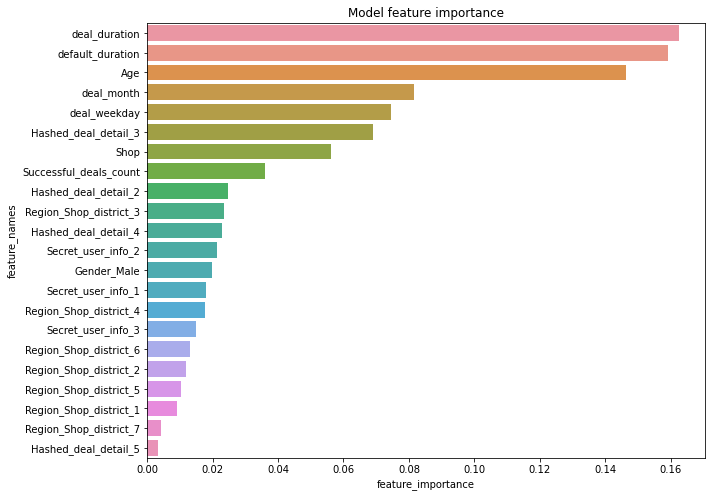

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

fi_df = pd.DataFrame({'feature_names': X_train.columns,
                      'feature_importance': rf.feature_importances_})

plt.figure(figsize=(10,8))
sns.barplot(x='feature_importance', y='feature_names', 
            data=fi_df.sort_values('feature_importance', ascending=False))
plt.title('Model feature importance');

Можем отметить, что максимальное влияние на обучение модели имеют признаки, полученные из дат различных событий в исходной выборке, а также возраст клиента.

In [118]:
y_pred = rf.predict_proba(X_test)[:,1]

In [119]:
y_pred.min(), y_pred.mean(), y_pred.max()

(0.0, 0.13020222446916077, 0.77)

Записываем в файл результаты модели.

In [120]:
# result_rf.to_csv('prediction_rf.csv')

***5) CatBoost***

In [121]:
from catboost import CatBoostClassifier

In [122]:
catboost = CatBoostClassifier(verbose=0)

Найдем лучшие гиперпараметры для CatBoostClassifier.

In [123]:
cb_parameters_grid = {'depth':[3, 7, 11], 'iterations':[100, 500, 1000],
                      'learning_rate':[0.01, 0.1, 0.2],
                      'l2_leaf_reg':[1,3,5]}

search_cb = GridSearchCV(
    catboost,
    cb_parameters_grid,
    scoring="accuracy",
    cv=custom_cv,
    return_train_score=True
)

search_cb.fit(xx_train, yy_train)

IndexError: indices are out-of-bounds

In [ ]:
search_cb.best_params_

In [ ]:
catboost_turbo = CatBoostClassifier(verbose=0)
catboost_turbo.set_params(**search_cb.best_params_)

In [ ]:
catboost_turbo.fit(xx_train, yy_train)

In [ ]:
train_preds = catboost_turbo.predict(xx_train) 
train_accuracy = np.mean(train_preds == yy_train.values)

test_preds = catboost_turbo.predict(xx_test) 
test_accuracy = np.mean(test_preds == yy_test.values)

print(f"Accuracy на тренировочной выборке составило \
{np.round(train_accuracy, decimals=3)}")
print(f"Accuracy на тестовой выборке составило \
{np.round(test_accuracy, decimals=3)}")

In [ ]:
catboost_turbo.get_feature_importance(prettified=True).head(10)

In [ ]:
y_pred3 = catboost_turbo.predict_proba(X_test)[:,1]

In [ ]:
y_pred3.min(), y_pred3.mean(), y_pred3.max()